In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
print('Number of Rows{}Columns'.format(data.shape))

Number of Rows(50, 5)Columns


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df=data.copy()
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
df.isnull().sum()

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [12]:
df[df.values==0.0]

,RnD,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [13]:
print('Zero Values in R&D Spend is',(df['RnD'] == 0).sum(),'\n'
      'Zero Values in Administration is',(df['admin'] == 0).sum(),'\n'
      'Zero Values in Marketing is',(df['marketing'] == 0).sum(),'\n'
      'Zero Values in Profit is',(df['profit'] == 0).sum())

Zero Values in R&D Spend is 2 
Zero Values in Administration is 0 
Zero Values in Marketing is 3 
Zero Values in Profit is 0


<Axes: >

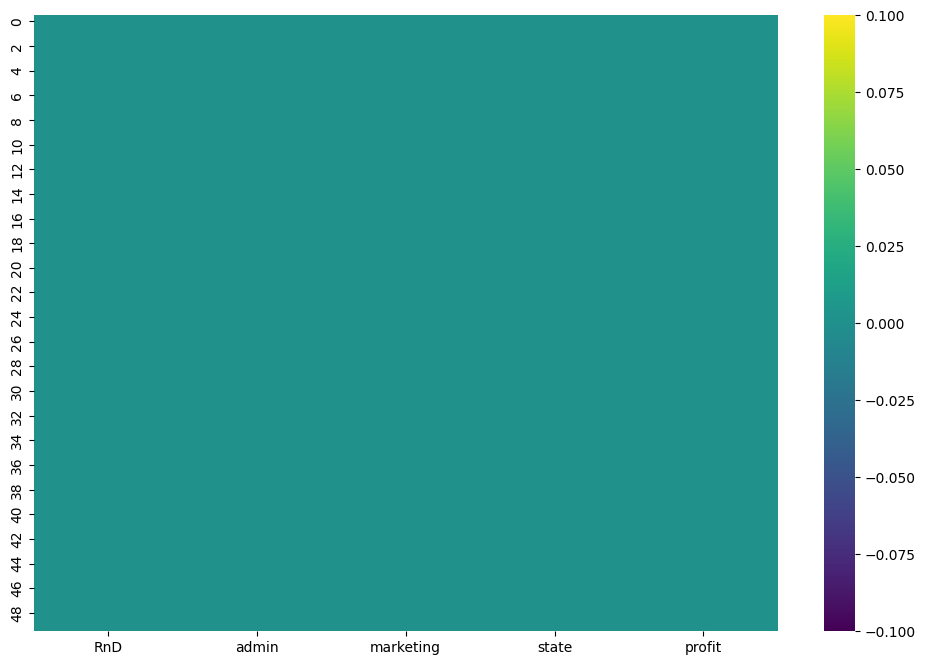

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [15]:

df[df.duplicated()].shape

(0, 5)

In [16]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [17]:

df[df.duplicated()]

,RnD,admin,marketing,state,profit


In [18]:
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


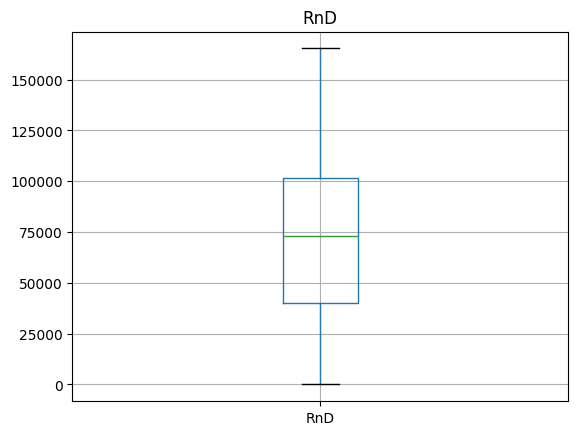

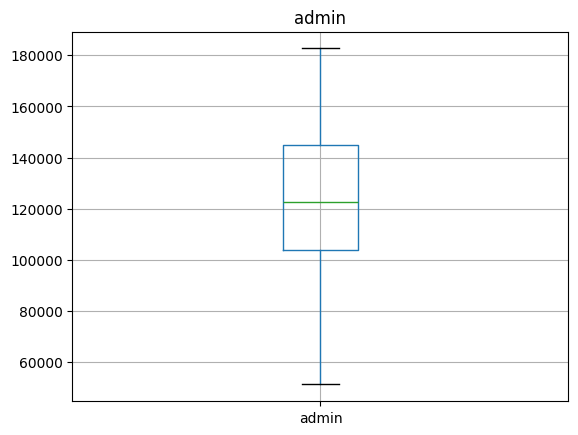

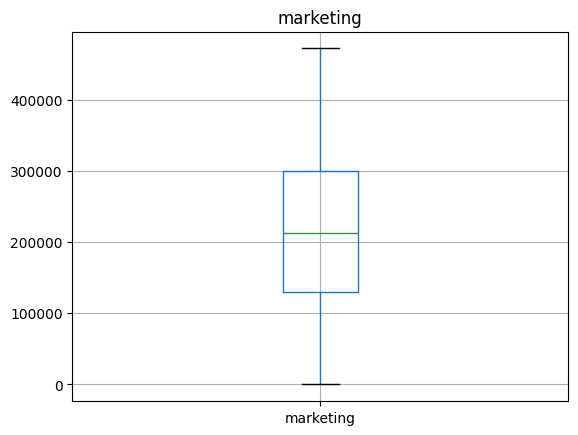

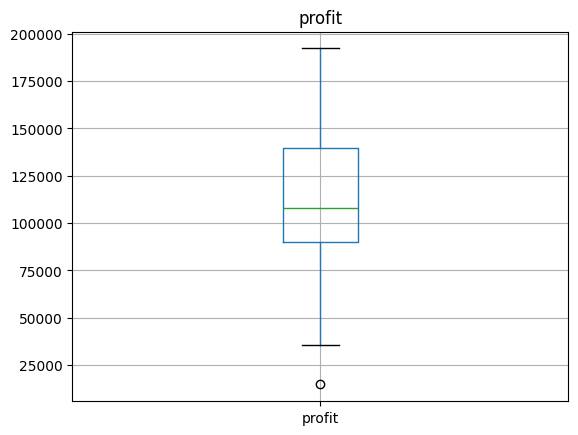

In [19]:
for feature in continuous_feature:
    data=df.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

In [20]:
Q1 = np.quantile(df.profit,0.25)
Q3 = np.quantile(df.profit,0.75)
med = np.median(df.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [21]:
Outliers = df.profit[(df.profit <= lower_bound) | (df.profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: profit, dtype: float64


In [22]:
display(df[df.index.isin([49])],df.head())

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


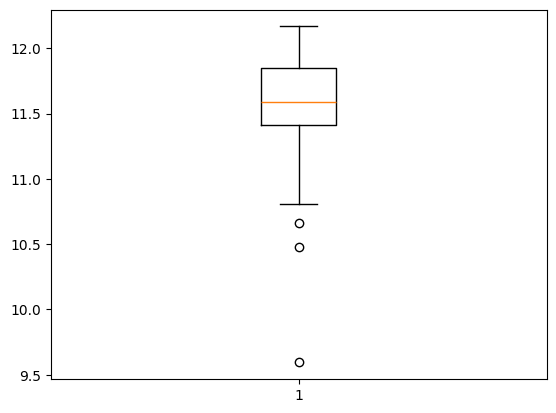

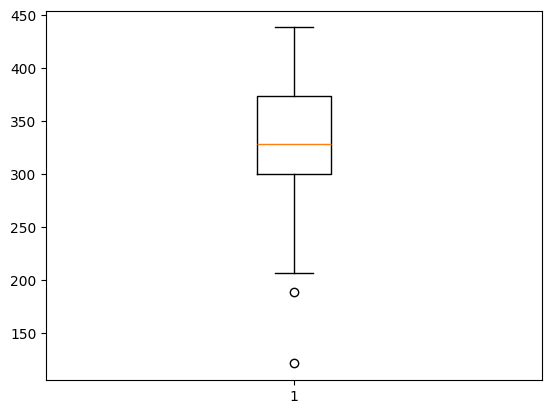

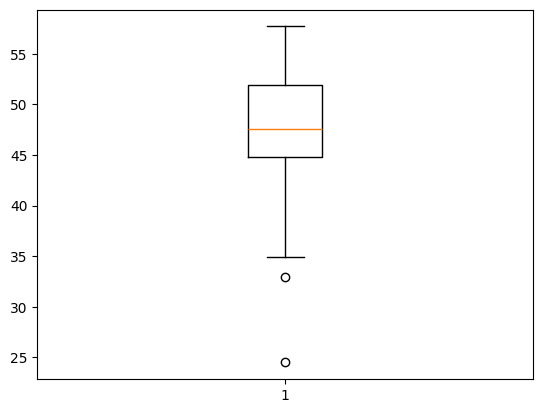

In [26]:
plt.subplots()
plt.subplot()
plt.boxplot(np.log(df['profit']))
plt.show()
plt.subplot()
plt.boxplot(np.sqrt(df['profit']))
plt.show()
plt.subplot()
plt.boxplot(np.cbrt(df['profit']))
plt.show()

In [27]:
raw_model = sm.ols("profit~RnD+admin+marketing", data = df).fit()

In [28]:
# Finding rsquared values
raw_model.rsquared , raw_model.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

In [29]:
df.profit.median()

107978.19

Text(0.5, 1.0, 'Profit before median imputation')

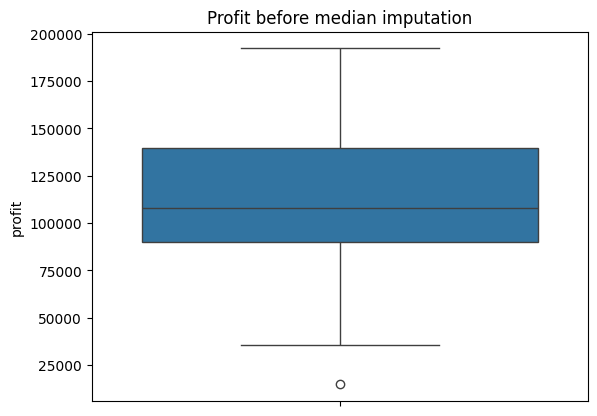

In [30]:
df1=df.copy()
sns.boxplot(df['profit'])
plt.title('Profit before median imputation')

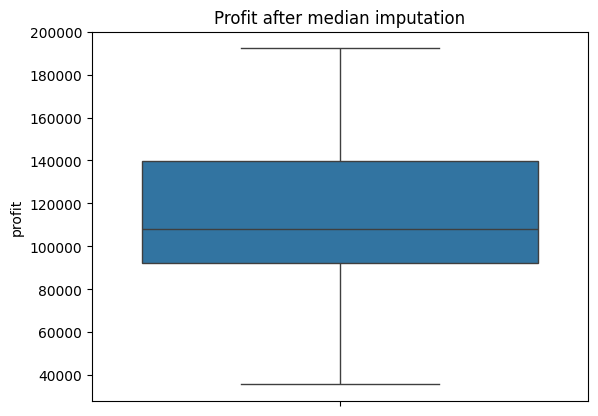

In [31]:
for i in df1['profit']:
    q1 = np.quantile(df.profit,0.25)
    q3 = np.quantile(df.profit,0.75)
    med = np.median(df.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['profit'] = df1['profit'].replace(i, np.median(df1['profit']))
sns.boxplot(df1['profit'])
plt.title('Profit after median imputation')
plt.show()

In [32]:
after_median_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 

(0.9182958360807372, 0.91296730365122)

Text(0.5, 1.0, 'Profit after mean imputation')

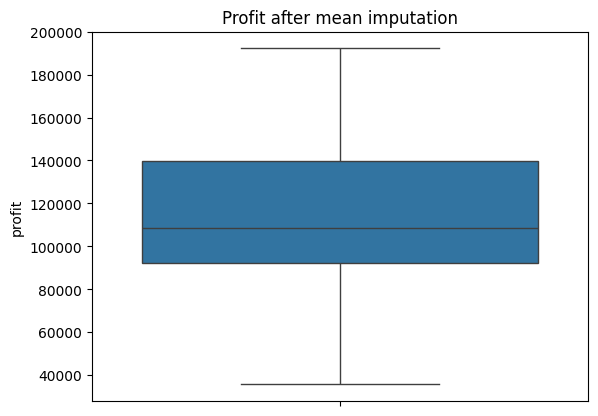

In [33]:
df2=df.copy()
for i in df2['profit']:
    q1 = np.quantile(df2.profit,0.25)
    q3 = np.quantile(df2.profit,0.75)
    med = np.median(df2.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['profit'] = df2['profit'].replace(i, np.mean(df2['profit']))
sns.boxplot(df2['profit'])
plt.title('Profit after mean imputation')

In [34]:
after_mean_imputation_model = sm.ols("profit~RnD+admin+marketing", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj 

(0.9119537155310937, 0.9062115665439912)

In [35]:
df3=df.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

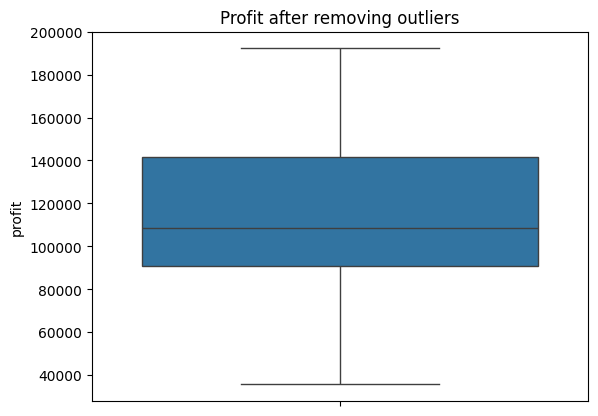

In [36]:
drop_outliers(df3, 'profit')
sns.boxplot(df3.profit)
plt.title('Profit after removing outliers')

In [37]:
removed_outlier_model = sm.ols("profit~RnD+admin+marketing", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

In [38]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Profit')

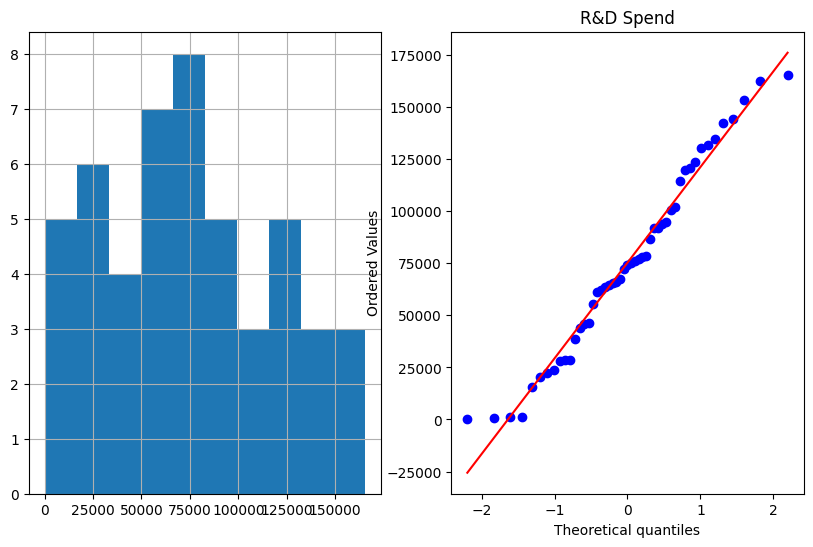

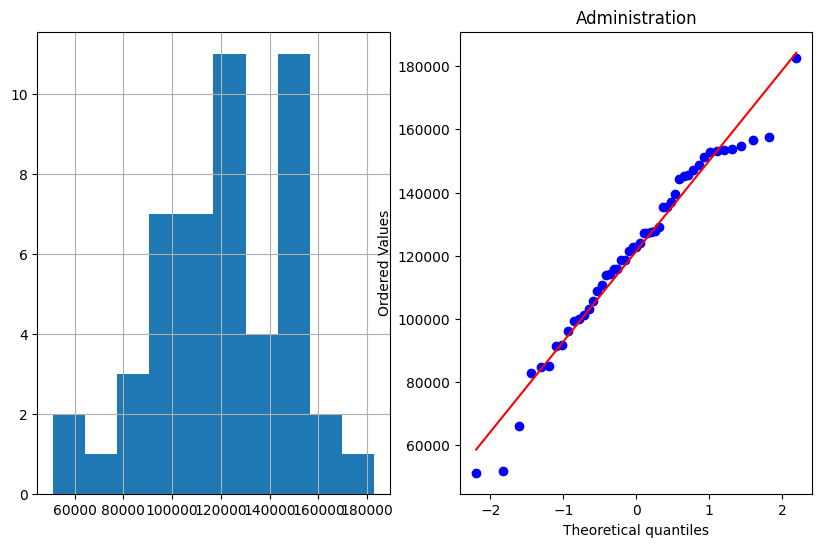

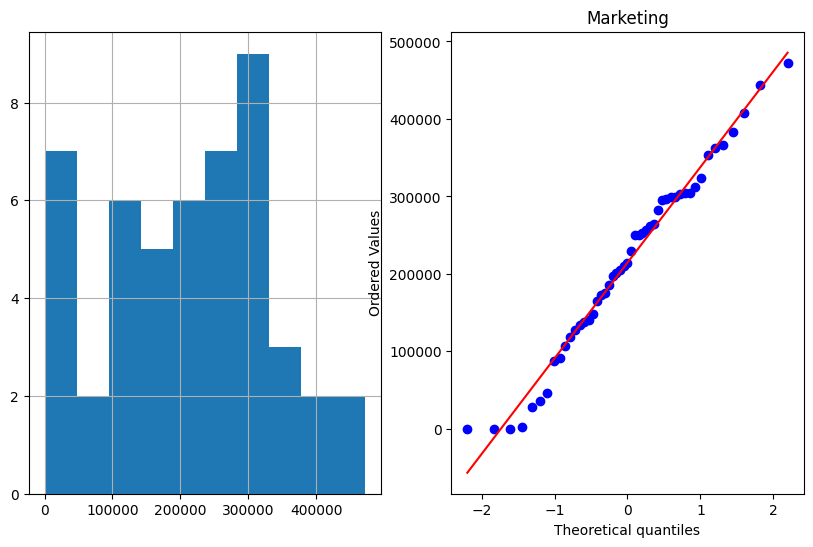

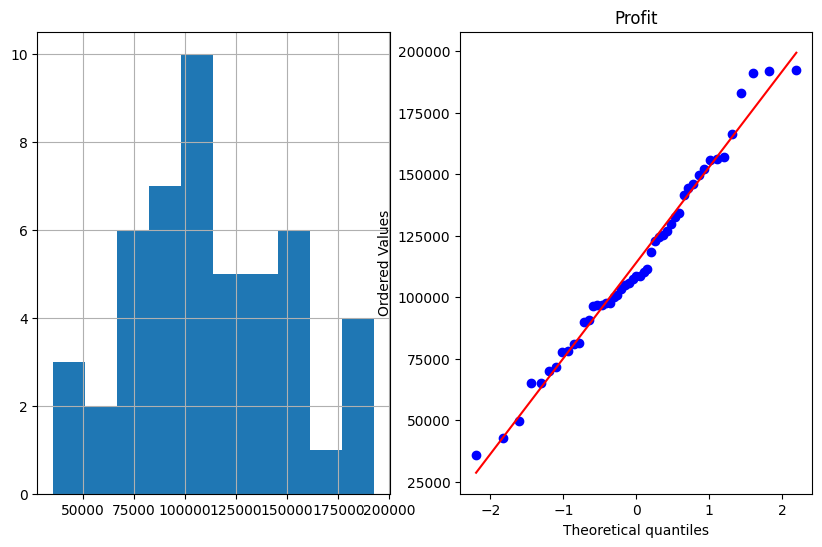

In [39]:
plot_data(df3,'RnD')
plt.title('R&D Spend')
plot_data(df3,'admin')
plt.title('Administration')
plot_data(df3,'marketing')
plt.title('Marketing')
plot_data(df3,'profit')
plt.title('Profit')

<Axes: ylabel='count'>

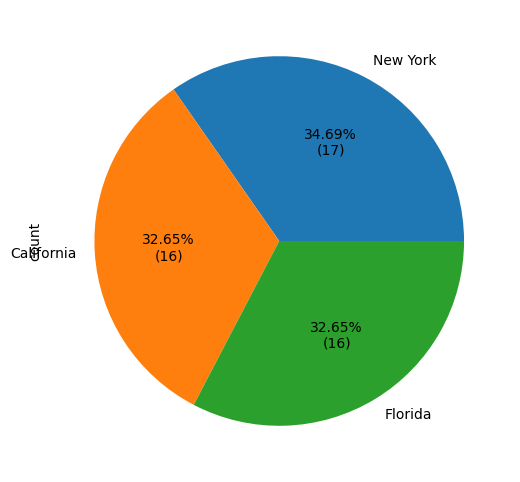

In [41]:
plt.figure(figsize=(8,6))
df3['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df3['state'].value_counts().sum())))


In [42]:
df3.state.value_counts()

state
New York      17
California    16
Florida       16
Name: count, dtype: int64

In [43]:

df3.columns

Index(['RnD', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [44]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('R&D Spend feature',shapiro(df3.RnD),'\n'
     'Administration feature',shapiro(df3.admin),'\n'
     'Marketing Spend feature',shapiro(df3.marketing),'\n'
     'Profit feature',shapiro(df3.profit))

R&D Spend feature ShapiroResult(statistic=0.9705320033774986, pvalue=0.25422837629876716) 
Administration feature ShapiroResult(statistic=0.9695431292686986, pvalue=0.23222163489691944) 
Marketing Spend feature ShapiroResult(statistic=0.9757173513496741, pvalue=0.40168843300172824) 
Profit feature ShapiroResult(statistic=0.979339572871486, pvalue=0.5378900431354126)


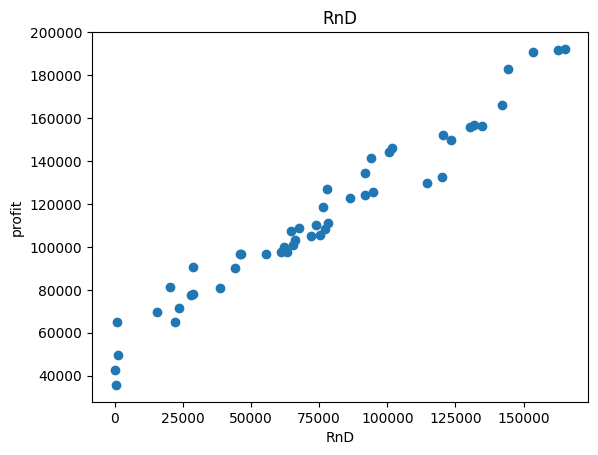

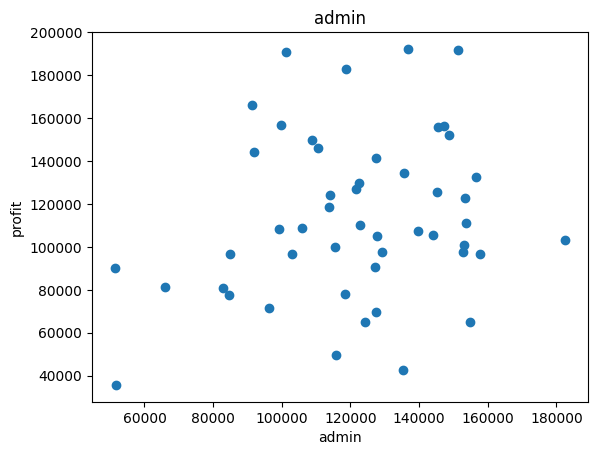

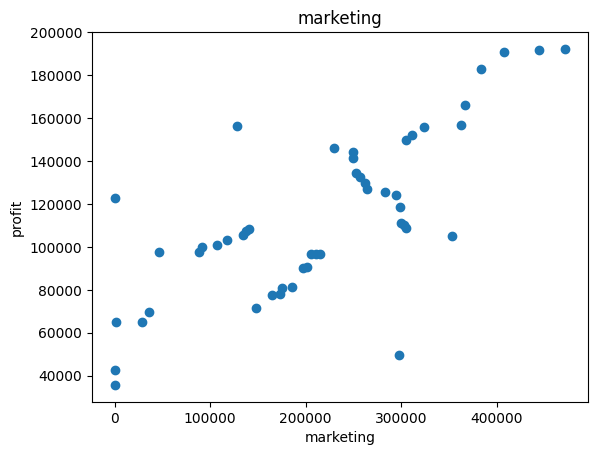

In [45]:
for feature in continuous_feature:
    if feature!="profit":
        data=df3.copy()         
        plt.scatter(data[feature],data['profit'])
        plt.xlabel(feature)
        plt.ylabel('profit')
        plt.title(feature)
        plt.show()

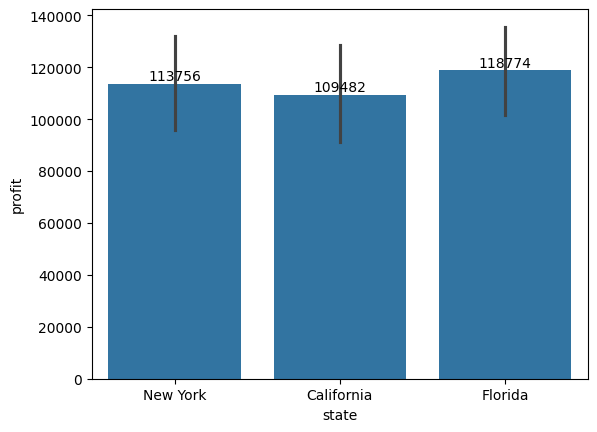

In [46]:
ax = sns.barplot(x = "state", y = 'profit', data = df3)
for i in ax.containers:
    ax.bar_label(i,)

In [47]:
df4=df3.drop('state',axis=1)
df4.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [48]:
df4.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.243438,0.711654,0.978437
admin,0.243438,1.000000,-0.037280,0.205841
marketing,0.711654,-0.037280,1.000000,0.739307
profit,0.978437,0.205841,0.739307,1.000000


<Axes: >

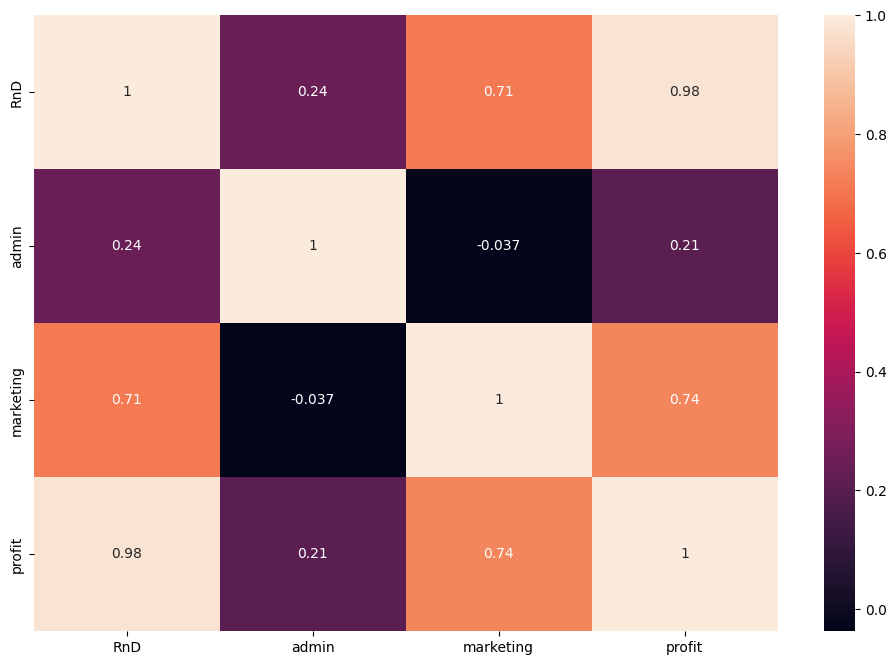

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df4.corr(),
    annot=True)

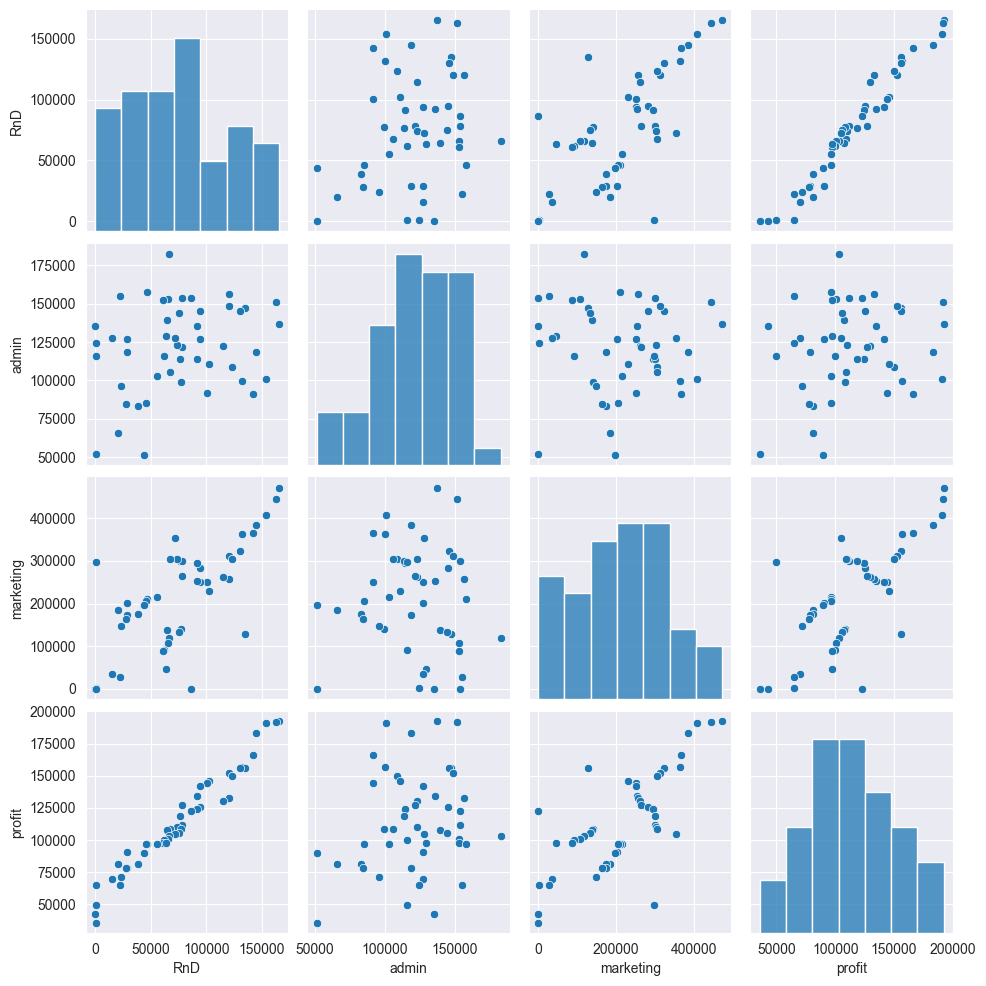

In [50]:
sns.set_style(style='darkgrid')
sns.pairplot(df4)

In [51]:
df_standard_scaled = df4.copy()
features = df_standard_scaled[continuous_feature]

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,RnD,admin,marketing,profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


In [53]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 RnD          0.0
admin       -0.0
marketing   -0.0
profit      -0.0
dtype: float64 
Standard Devaition 
 RnD          1.0
admin        1.0
marketing    1.0
profit       1.0
dtype: float64 1


In [54]:
import statsmodels.formula.api as sm
model = sm.ols("profit~RnD+admin+marketing", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           8.85e-32
Time:                        20:38:58   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.419e-16      0.029  -4.84e-15      1.000      -0.059       0.059
RnD            0.9254      0.045     20.470      0.000       0.834       1.017
admin         -0.0165      0.032     -0.518      0.607      -0.080       0.048
marketing      0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Finding Coefficient parameters
model.params


Intercept   -1.419157e-16
RnD          9.254411e-01
admin       -1.646059e-02
marketing    8.009988e-02
dtype: float64

In [56]:
# Finding tvalues and pvalues
display(model.tvalues, model.pvalues)


Intercept   -4.840300e-15
RnD          2.046950e+01
admin       -5.178888e-01
marketing    1.825383e+00
dtype: float64

Intercept    1.000000e+00
RnD          1.971077e-24
admin        6.070728e-01
marketing    7.458443e-02
dtype: float64

In [57]:
admin_slr_model = sm.ols("profit~admin", data = df_standard_scaled).fit()
# Finding tvalues and pvalues
display(admin_slr_model.tvalues, admin_slr_model.pvalues)

Intercept   -1.480332e-15
admin        1.442053e+00
dtype: float64

Intercept    1.000000
admin        0.155918
dtype: float64

In [58]:
# Finding rsquared values
admin_slr_model.rsquared , admin_slr_model.rsquared_adj 

(0.04237035844418102, 0.02199525968767435)

In [59]:
marketing_slr_model = sm.ols("profit~marketing", data = df_standard_scaled).fit()
# Finding tvalues and pvalues
display(marketing_slr_model.tvalues, marketing_slr_model.pvalues)

Intercept   -2.151320e-15
marketing    7.526983e+00
dtype: float64

Intercept    1.000000e+00
marketing    1.304853e-09
dtype: float64

In [60]:
# Finding rsquared values
marketing_slr_model.rsquared , marketing_slr_model.rsquared_adj 

(0.5465748398585546, 0.536927496025758)

In [61]:
# So if we combine admin and marketing feature to predict profit we should get a total R-sqaure value of 58% right?
# lets check
admin_plus_marketing= sm.ols('profit~admin+marketing', data =df_standard_scaled).fit()
# Finding rsquared values
admin_plus_marketing.rsquared , admin_plus_marketing.rsquared_adj 

(0.6011271008483878, 0.5837848008852743)

In [62]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df_standard_scaled[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,1.175172
0,marketing,2.239957
2,RnD,2.377754


In [63]:
admin_present_model= sm.ols('profit~RnD+admin', data= df4).fit()
admin_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.69e-32
Time:                        20:40:44   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD            0.8349      0.026     31.847      0.000       0.782       0.888
admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

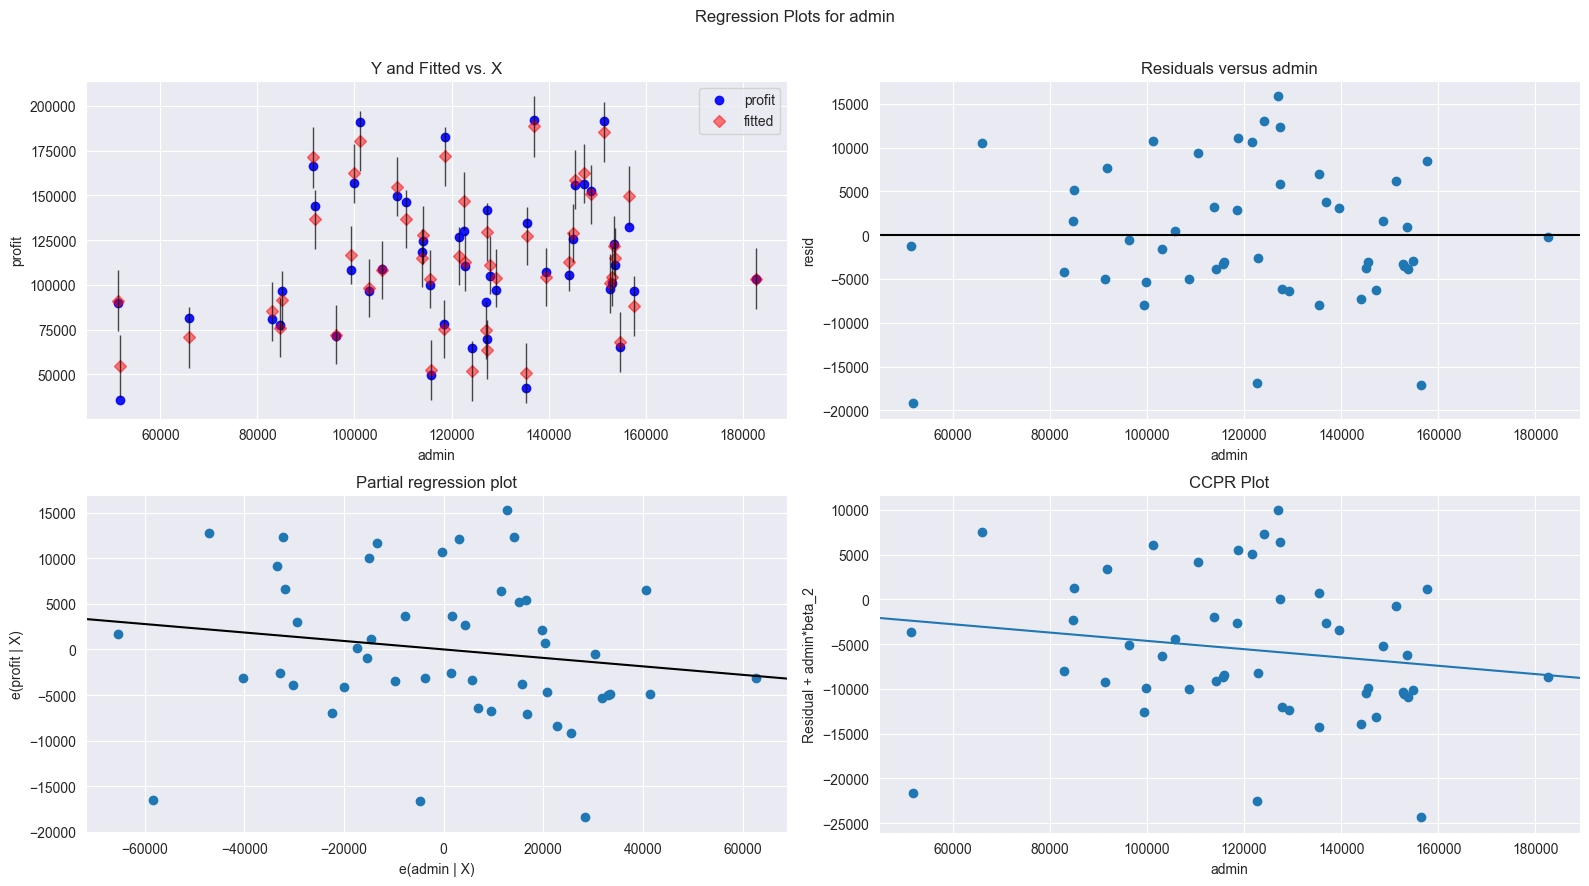

In [64]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(admin_present_model, 'admin', fig=fig)
plt.show()

In [65]:
marketing_present_model= sm.ols('profit~RnD+marketing', data= df4).fit()
marketing_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.74e-33
Time:                        20:41:10   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

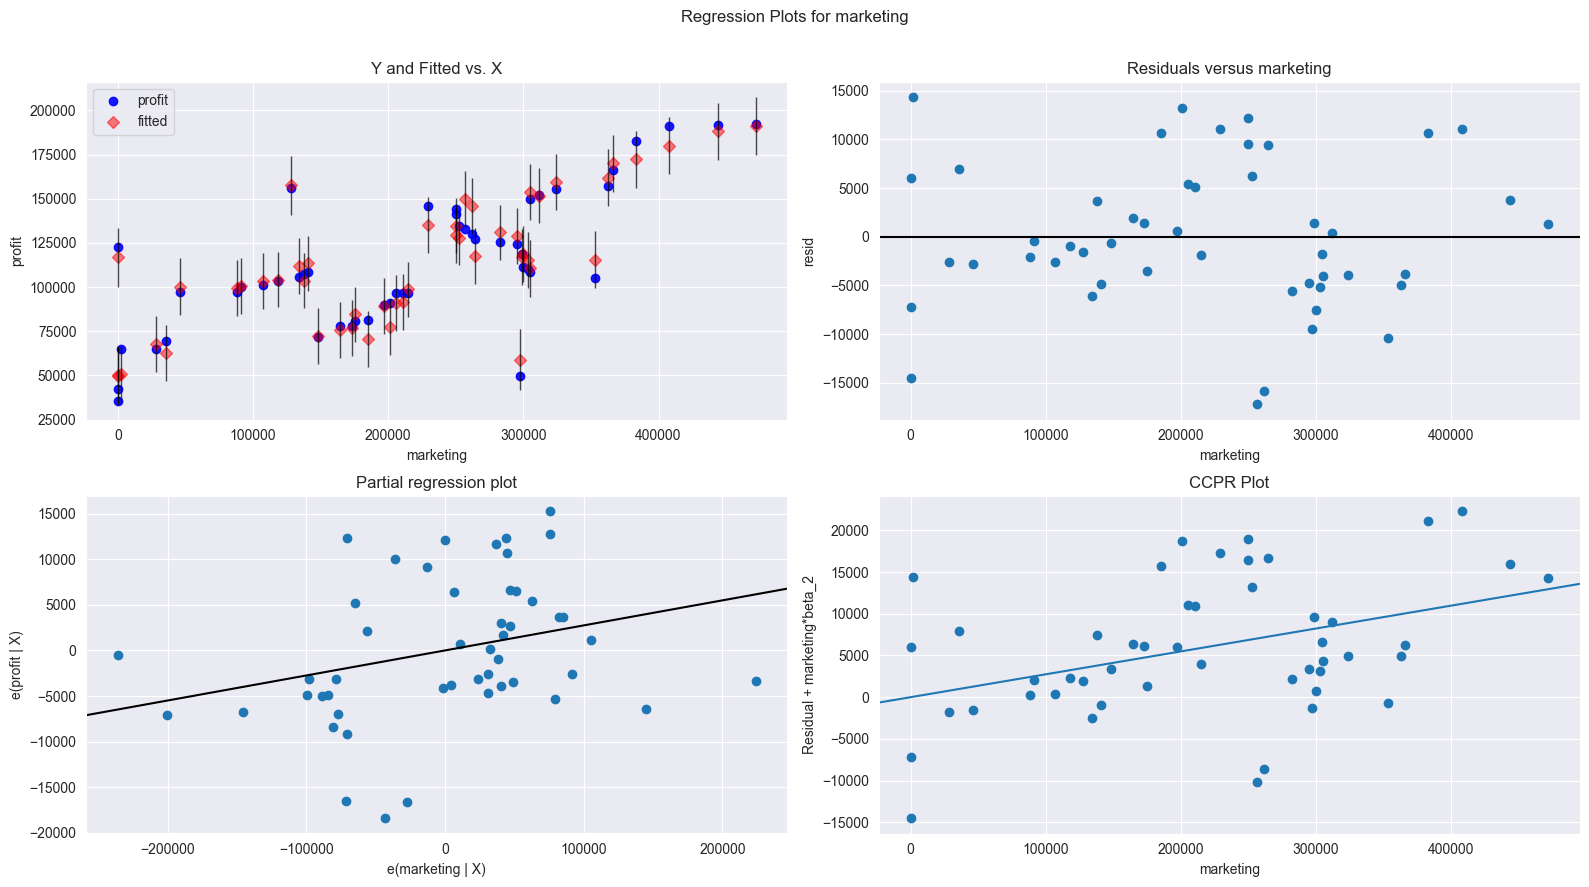

In [66]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(marketing_present_model, 'marketing', fig=fig)
plt.show()

In [67]:
df_standard_scaled.columns

Index(['RnD', 'admin', 'marketing', 'profit'], dtype='object')

In [68]:
print('Adminstration Model=', np.sqrt(admin_present_model.mse_resid),'\n''Marketing Model=', np.sqrt(marketing_present_model.mse_resid))

Adminstration Model= 7947.922013017302 
Marketing Model= 7691.884748549172


In [69]:
rmse_compare = {'Adminstration Model': np.sqrt(admin_present_model.mse_resid),'Marketing Model': np.sqrt(marketing_present_model.mse_resid)}
min(rmse_compare, key=rmse_compare.get)

'Marketing Model'

In [70]:
final_model = sm.ols('profit~RnD+marketing', data=df4).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.74e-33
Time:                        20:42:04   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

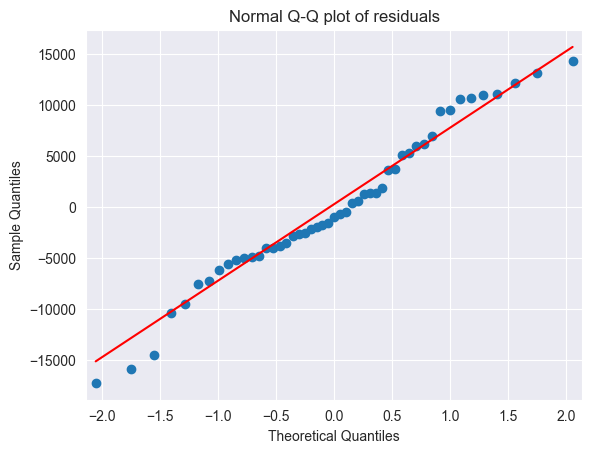

In [71]:
#Residuals values  = y - yhat
smf.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [72]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

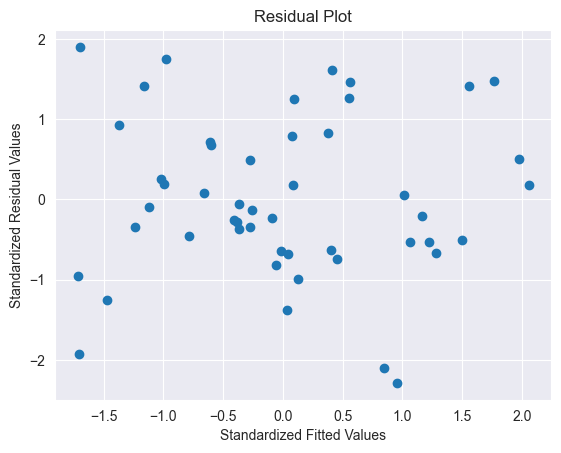

In [73]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

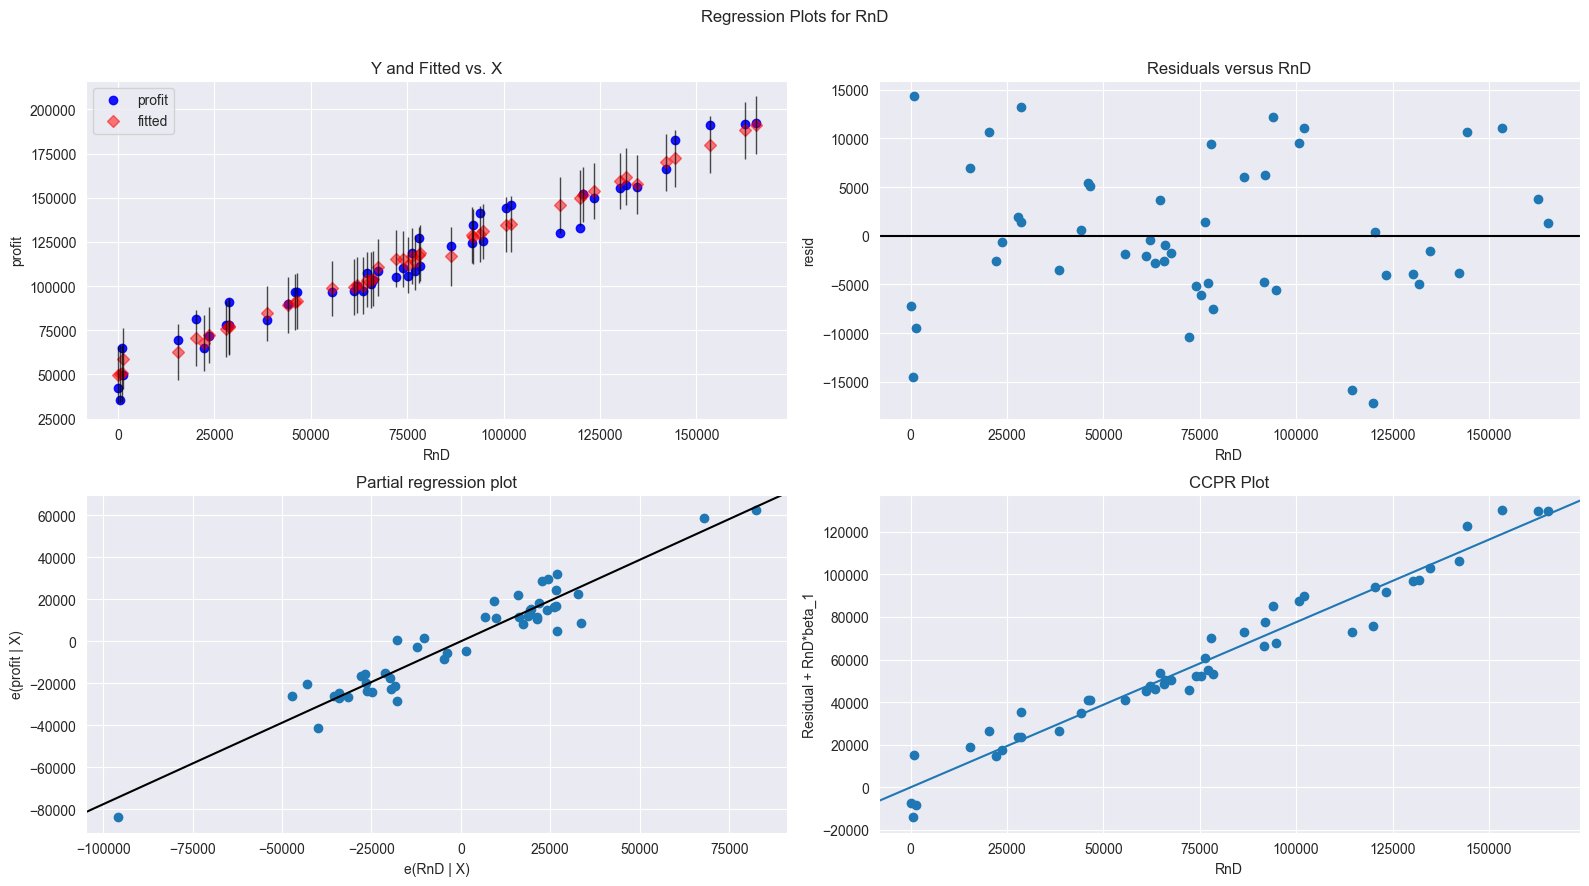

In [74]:
fig = plt.figure(figsize = (16,9))
plot_RnD = smf.graphics.plot_regress_exog(final_model, 'RnD', fig=fig)
plt.show()

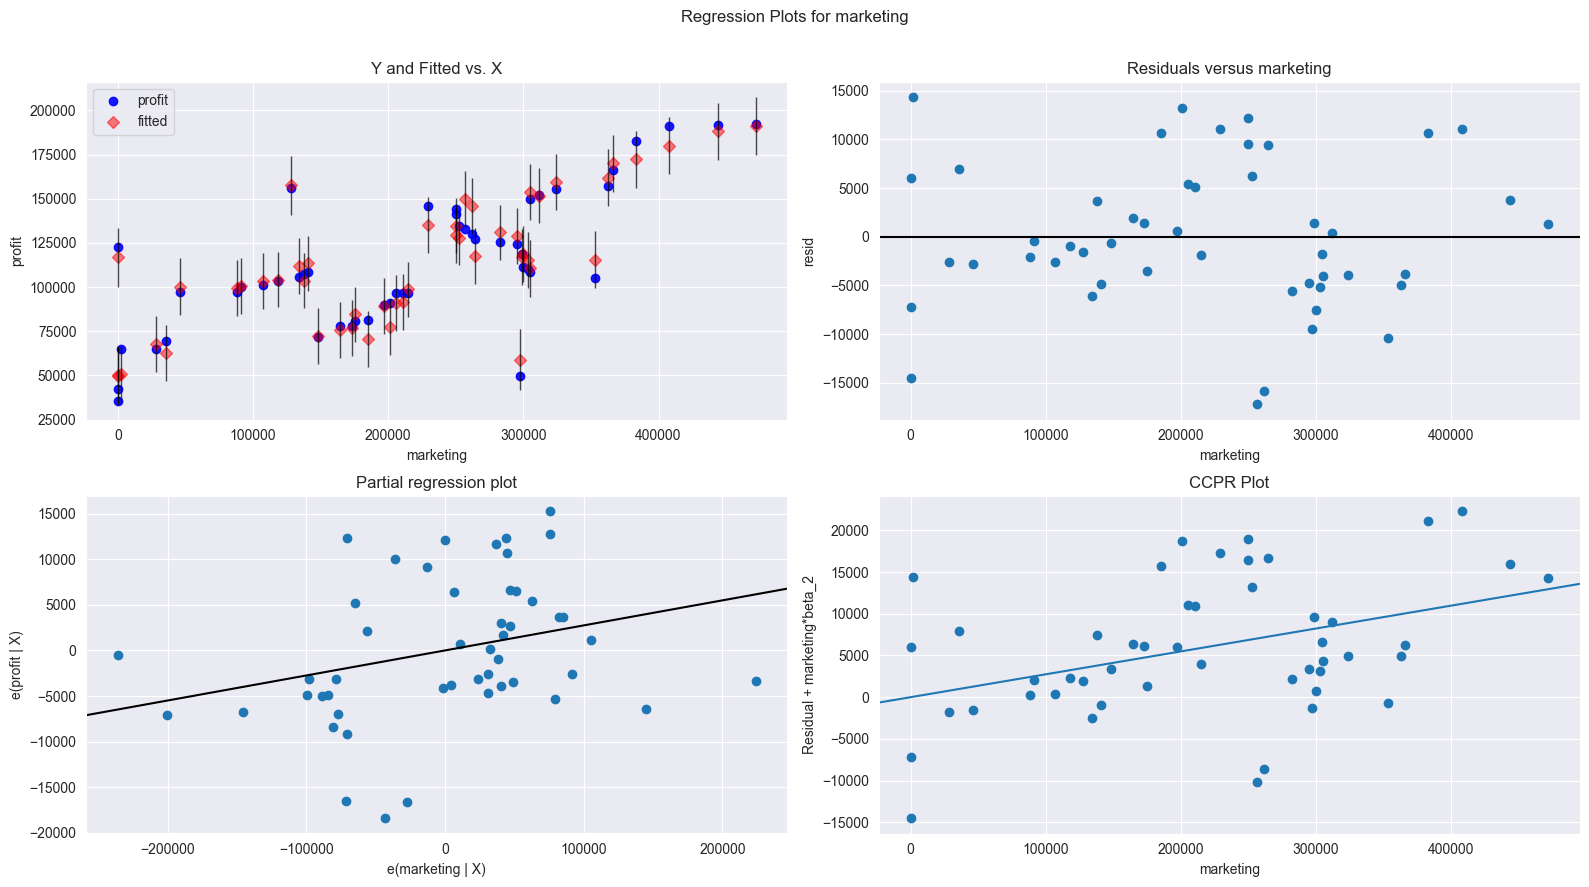

In [75]:
fig = plt.figure(figsize = (16,9))
plot_marketing = smf.graphics.plot_regress_exog(final_model, 'marketing', fig=fig)
plt.show()

In [76]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

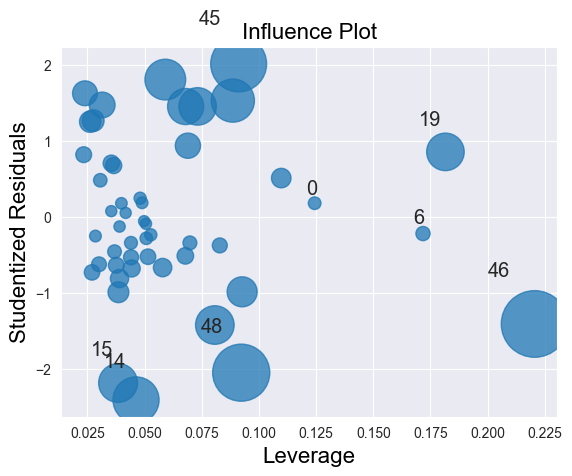

In [77]:
influence_plot(final_model)
plt.show()

In [78]:
k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


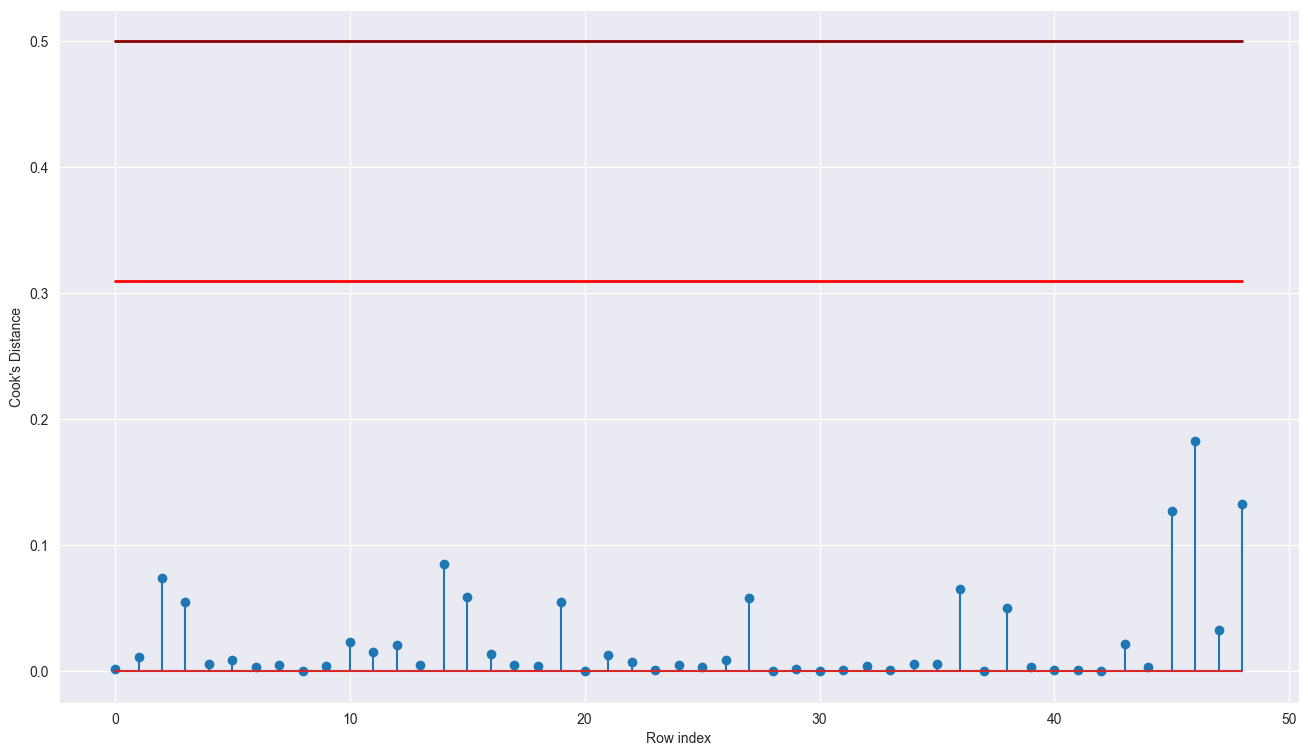

In [79]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [80]:
predicted = pd.DataFrame()
predicted['RnD'] = df4.RnD
predicted['marketing'] = df4.marketing
predicted['Profit'] = df4.profit
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD','marketing']]))
predicted

,RnD,marketing,Profit,Predicted_Profit
0,165349.20,471784.10,192261.83,190942.726927
1,162597.70,443898.53,191792.06,188043.924520
2,153441.51,407934.54,191050.39,179957.312472
3,144372.41,383199.62,182901.99,172246.416164
4,142107.34,366168.42,166187.94,170022.687457
5,131876.90,362861.36,156991.12,161999.405410
6,134615.46,127716.82,156122.51,157669.178690
7,130298.13,323876.68,155752.60,159705.298181
8,120542.52,311613.29,152211.77,151804.380605
9,123334.88,304981.62,149759.96,153787.521922


In [81]:
display(df[df.index.isin([49])])

,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [82]:
new_data=pd.DataFrame({'RnD':0.0,"marketing":45173.06},index=[0])
new_data


,RnD,marketing
0,0.0,45173.06


In [83]:
new_data['predited_profit']=final_model.predict(new_data)
new_data

,RnD,marketing,predited_profit
0,0.0,45173.06,51025.067542


In [84]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Final_Model'],
        'R_squared':[raw_model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,removed_outlier_model.rsquared,final_model.rsquared],
        'R_squared_adjusted':[raw_model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,final_model.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),np.sqrt(final_model.mse_resid)]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.911954,0.906212,11570.325358
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Final_Model,0.961086,0.959394,7691.884749


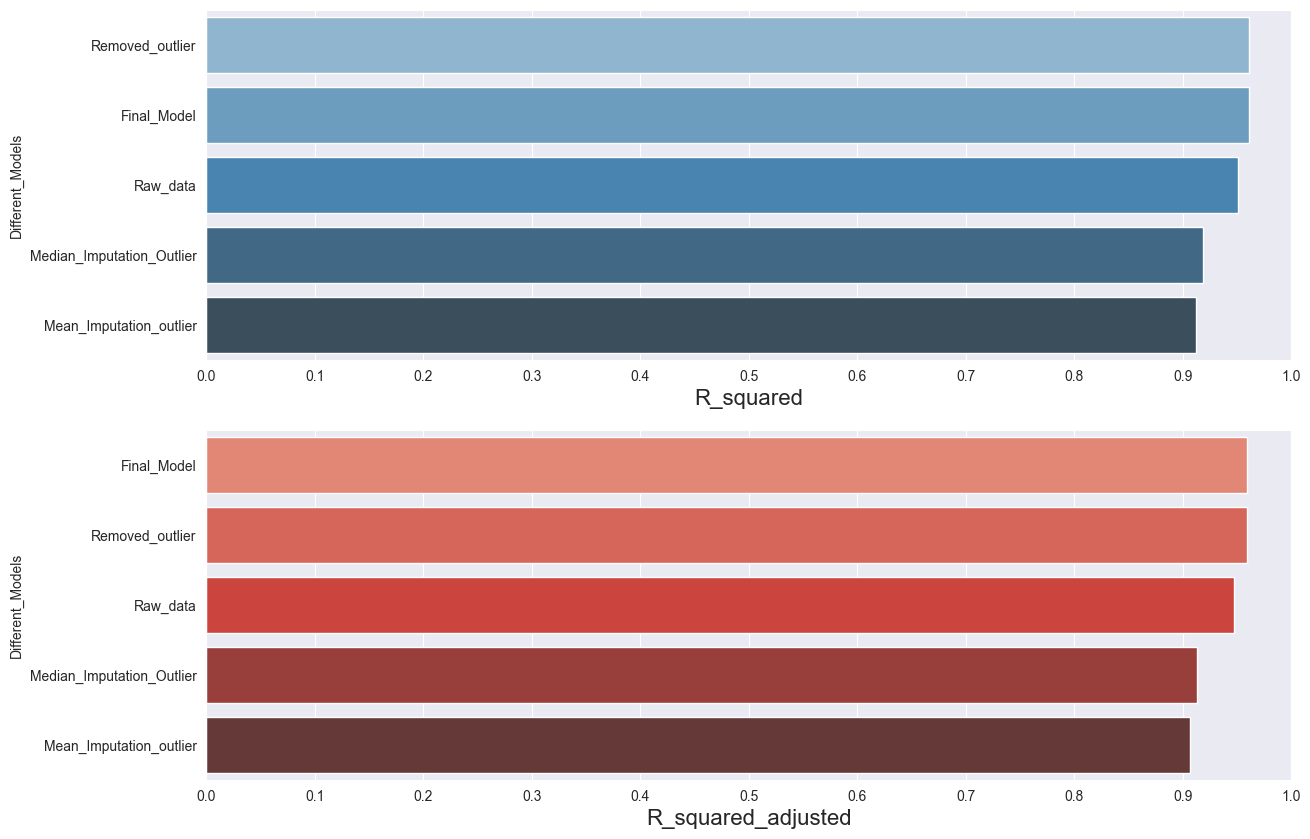

In [85]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()


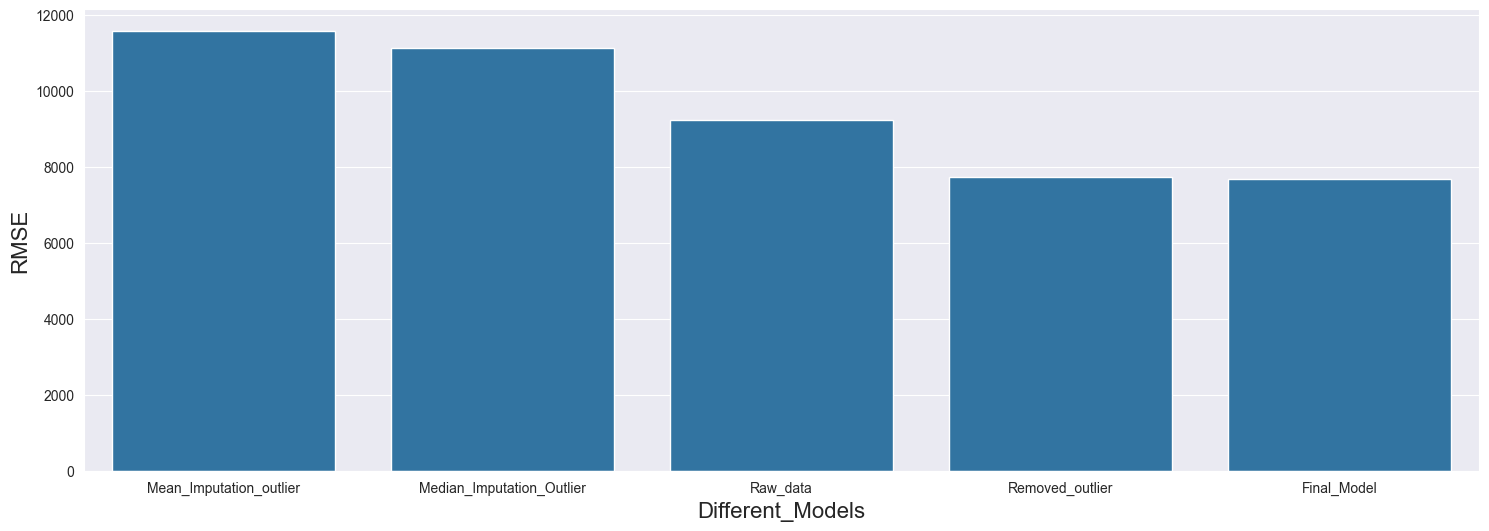

In [86]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Different_Models', y='RMSE', data=model_table, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()